# 银行定期存款产品营销数据分析

## 目录
> **简介**

> **数据清洗**

> **可视化分析**

> **回归分析**

> **结论**

## 简介
> 本数据集来自葡萄牙银行定期存款产品营销活动数据，主要包含三部分的信息。第一部分为客户基本信息，如年龄、职业、婚姻状况、受教育程度等；第二部分为与客户的沟通信息，如上次营销活动中与客户沟通时所在的月份、工作日、时长等；第三部分为社会经济数据，如消费者价格指数、消费者信心指数等。

> 通过此数据集，我们将要探讨以下问题：具备哪什么特征的客户更有可能购买定期存款产品？在什么时间与客户沟通更有可能让客户购买存款产品？如何根据数据分析结果指导银行的营销活动？

## 1.数据清洗

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
% matplotlib inline

C:\Users\Liu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## 2.可视化分析

**2.1 各年龄段购买银行存款的比例**

In [4]:
#查看年龄分布情况
df['age'].describe()

#分组
bin_age=[17.00000,30.00000,40.00000,50.00000,98.00000]
bin_name=['A','B','C','D']
df['age_cut']=pd.cut(df['age'],bin_age,labels=bin_name,include_lowest=True)

In [5]:
#计算各组购买、不购买存款产品的比例
age=df.groupby(['age_cut','y'])['age'].count()
age_total=df.groupby(['age_cut']).count()['age']
proportion=age/age_total

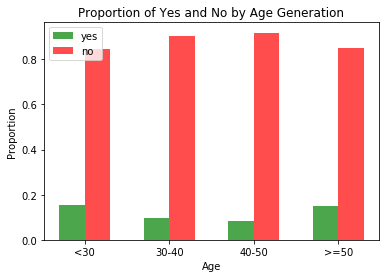

In [6]:
#绘制柱状图
proportion_no=proportion[:,'no']
proportion_yes=proportion[:,'yes']
ind=np.arange(proportion_no.shape[0])
width=0.3

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Age')
plt.title('Proportion of Yes and No by Age Generation')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['<30', '30-40', '40-50', '>=50']  # x 坐标刻度标签
plt.xticks(locations, labels)

plt.legend(loc='upper left')

由上图可知，低于30岁和高于50岁人群购买产品比例高于中间人群。

**2.2 职业与购买银行存款产品的关系**

In [7]:
df_job=df.drop(df.query('job=="unknown"').index,axis=0)
job=df_job.groupby(['job','y'])['age'].count()
job_total=df_job.groupby('job')['age'].count()
proportion=job/job_total

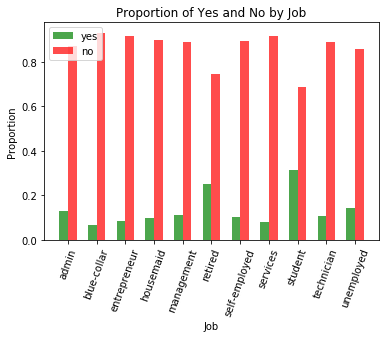

In [8]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Job')
plt.title('Proportion of Yes and No by Job')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['admin', 'blue-collar', 'entrepreneur', 'housemaid','management','retired','self-employed','services','student','technician','unemployed']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

由图可知，退休人群和学生购买定期存款的比例明显高于其他人群。

**2.3 受教育程度与购买银行定期存款的关系**

In [9]:
df_education=df.drop(df.query('education=="unknown"').index,axis=0)
education=df_education.groupby(['education','y'])['age'].count()
education_total=df_education.groupby('education')['age'].count()
proportion=education/education_total

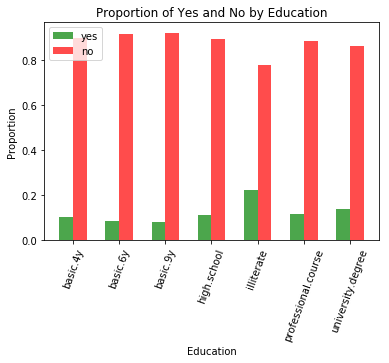

In [10]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Education')
plt.title('Proportion of Yes and No by Education')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school','illiterate','professional.course','university.degree']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

由图可知，不识字人群购买定期存款的比例最高。

**2.4 房贷与购买存款产品的关系**

*注：由于'default'、‘loan’数据分别存在部分缺失、数据量相差太大的问题，因此使用数据质量更好的‘housing’进行分析。*

In [11]:
df_housing=df.drop(df.query('housing=="unknown"').index)
housing=df_housing.groupby(['housing','y'])['age'].count()
housing_total=df_housing.groupby('housing')['age'].count()
proportion=housing/housing_total

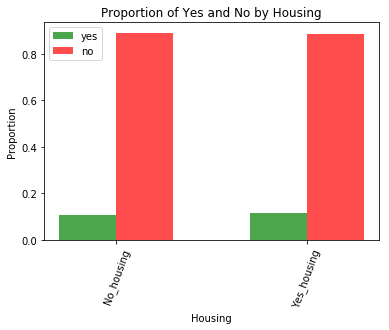

In [12]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Housing')
plt.title('Proportion of Yes and No by Housing')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['No_housing','Yes_housing']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

有/无房贷人群中购买产品的比例差别不大。

**小结: 从上述分析可知，客户年龄对其是否会购买存款产品无明显影响；从职业来看，学生和退休人群中购买存款产品的比例更；不识字人群中购买存款产品的比例相比其它学历人群更高。**

**2.5 不同月份购买银行定期存款的差异**

In [13]:
df_month=df.drop(df.query('month=="unknown"').index,axis=0)
month=df_month.groupby(['month','y'])['age'].count()
month_total=df_month.groupby('month')['age'].count()
proportion=month/month_total

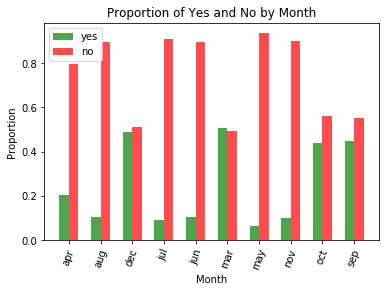

In [14]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Month')
plt.title('Proportion of Yes and No by Month')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['apr','aug', 'dec', 'jul','jun','mar','may','nov','oct','sep']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

图中dec、mar、oct、sep等月份客户购买贷款的比例较高，但考虑到这四个月份的数据量明显少于其它月份，因此需要更多数据才能得出可靠结论。

**2.6 不同工作日购买银行定期存款的差异**

In [15]:
df_dow=df.drop(df.query('day_of_week=="unknown"').index,axis=0)
dow=df_dow.groupby(['day_of_week','y'])['age'].count()
dow_total=df_dow.groupby('day_of_week')['age'].count()
proportion=dow/dow_total

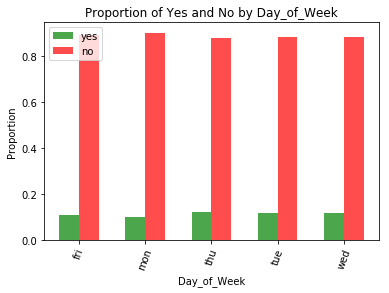

In [16]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Day_of_Week')
plt.title('Proportion of Yes and No by Day_of_Week')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['fri','mon', 'thu', 'tue','wed']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

由此图可知，不同工作日与客户沟通，其购买定期贷款并无明显区别。

**2.7 沟通持续时间与购买存款产品的关系**

In [17]:
df['duration'].describe()

bin_d=[0,102,180,319,4918]
bin_name=['short','medium','long','longer']
df['dura_cut']=pd.cut(df['duration'],bin_d,labels=bin_name,include_lowest=True)

duration=df.groupby(['dura_cut','y'])['age'].count()
duration_total=df.groupby(['dura_cut'])['age'].count()
proportion=duration/duration_total
proportion

dura_cut  y  
short     no     0.991562
          yes    0.008438
medium    no     0.954073
          yes    0.045927
long      no     0.894468
          yes    0.105532
longer    no     0.708382
          yes    0.291618
Name: age, dtype: float64

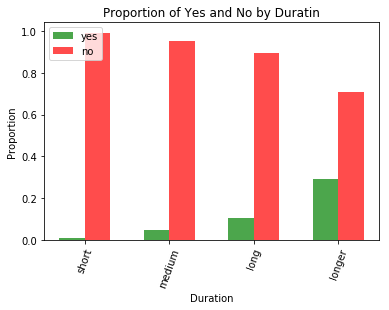

In [18]:
proportion_yes=proportion[:,'yes']
proportion_no=proportion[:,'no']

ind=np.arange(proportion_yes.shape[0])

yes_bar=plt.bar(ind,proportion_yes,width,color='g',alpha=0.7,label='yes')
no_bar=plt.bar(ind+width,proportion_no,width,color='r',alpha=0.7,label='no')

plt.ylabel('Proportion')
plt.xlabel('Duration')
plt.title('Proportion of Yes and No by Duratin')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['short','medium','long','longer']  # x 坐标刻度标签
plt.xticks(locations,labels,rotation=70)

plt.legend(loc='upper left')

有图可知，与客户沟通的持续时间与其是否购买存款产品具有较强联系，沟通持续时间越长，客户购买产品的比例越高。

**小结：从上述分析可知，在不同月份、工作日与客户沟通，其购买额存款产品比例无明显差异。但与客户沟通的时间长短对购买比例有较大影响，沟通时间越长，购买产品的比例越高。**

## 3.回归分析

**3.1年龄对购买定期存款的影响**

In [19]:
df['Y']=pd.get_dummies(df['y'])['yes']
df['intercept']=1

lm=sm.Logit(df['Y'],df[['intercept','age']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 468.233476
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41174
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:               -0.002147
Time:                        18:06:00   Log-Likelihood:            -1.9280e+07
converged:                       True   LL-Null:                   -1.9239e+07
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4263      0.061    -39.508      0.000      -2.547      -2.306
age            0.0090      0.001      6.160      0.000       0.006       0.012
==============================================================================
"""

In [20]:
np.exp(0.009)

1.0090406217738679

由此可知，在其它条件不变时，年龄每增加一个单位，购买存款产品的可能性增加约1倍。

**3.2 职业对购买定期存款的影响**

In [21]:
df_job['Y']=pd.get_dummies(df_job['y'])['yes']
df_dum=pd.get_dummies(df_job['job'])
df_job[['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician']]=df_dum[['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician']]
df_job['intercept']=1

#以unemployed为基准，将其它变量添加到回归模型中
lm=sm.Logit(df_job['Y'],df_job[['intercept','admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 486.988291
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                40846
Model:                          Logit   Df Residuals:                    40835
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                -0.04232
Time:                        18:06:01   Log-Likelihood:            -1.9892e+07
converged:                       True   LL-Null:                   -1.9084e+07
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.7987      0.090    -19.993      0.000      -1.975      -1.622
admin.           -0.1052      0.095     -1.113      0.266      -0.291       0.080
blue-collar      -0.8042      0.099     -8.133      0.000      -0.998      -0.610
entrepreneur     -0.5755      0.130     -4.426      0.000      -0.830      -0.321
housemaid        -0.3985      0.136     -2.924      0.003      -0.666      -0.131
management       -0.2700      0.107     -2.515      0.012      -0.480      -0.060
retired           0.7140      0.106      6.754      0.000       0.507       0.921
self-employed    -0.3457      0.125     -2.769      0.006      -0.590      -0.101
services         -0.6245      0.107     -5.833      0.000      -0.834      -0.415
student           1.0185      0.116      8.800      0.000       0.792       1.245
technician       -0.3093      0.098     -3.152      0.002      -0.502      -0.117
=================================================================================
"""

In [22]:
1/np.exp(-0.8042),1/np.exp(-0.5755),1/np.exp(-0.3985),1/np.exp(-0.2700),np.exp(0.7140),1/np.exp(-0.3457),1/np.exp(-0.6245),np.exp(1.0185),1/np.exp(-0.3093)

(2.2349078571729839,
 1.7780193143558396,
 1.4895886380587564,
 1.3099644507332475,
 2.0421435173290265,
 1.4129786586296897,
 1.8673120679453343,
 2.7690380901031237,
 1.3624710505135096)

从P值可以看出，自变量admin与是否购买定期存款间不具有统计相关性。其它具有统计相关性的职业中，在其它条件不变时，retired和student相比unemployed购买存款产品的可能性分别高2.0倍和2.8倍，这与前述结论相符。而unemployed则比其他人群更有可能购买存款产品。

**3.3 婚姻状况对购买定期存款的影响**

In [23]:
df_marital=df.drop(df.query('marital=="unknown"').index)
df_dum=pd.get_dummies(df_marital['marital'])
df_marital[['married','divorced']]=df_dum[['married','divorced']]

#以single为基准，将married、divorced添加到回归模型中
lm=sm.Logit(df_marital['Y'],df_marital[['intercept','married','divorced']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 470.539952
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                41096
Model:                          Logit   Df Residuals:                    41093
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:               -0.006647
Time:                        18:06:01   Log-Likelihood:            -1.9337e+07
converged:                       True   LL-Null:                   -1.9210e+07
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8145      0.027    -67.725      0.000      -1.867      -1.762
married       -0.3655      0.034    -10.741      0.000      -0.432      -0.299
divorced      -0.3473      0.055     -6.277      0.000      -0.456      -0.239
==============================================================================
"""

In [24]:
1/np.exp(-0.3655),1/np.exp(-0.3473)

(1.441234445247557, 1.4152412340611595)

由上述结果可知，married、divorced与是否购买存款产品均具有统计相关性。以single为基准，在其它条件不变时，其购买存款产品的可能性比married、divorced均高1.4倍，即单身人群更有可能购买存款产品，已婚和离异差别不大。

**3.4 受教育程度对购买定期存款的影响**

In [25]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [26]:
df_education=df.drop(df.query('education=="unknown"').index)
df_dum=pd.get_dummies(df_education['education'])
df_education[['basic.4y','high.school', 'basic.6y', 'basic.9y','professional.course', 'university.degree']]=df_dum[['basic.4y','high.school', 'basic.6y', 'basic.9y','professional.course', 'university.degree']]

#以illiterate为基准，将其它变量添加到回归模型中
lm=sm.Logit(df_education['Y'],df_education[['intercept','basic.4y','high.school', 'basic.6y', 'basic.9y','professional.course', 'university.degree']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 476.583883
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                39446
Model:                          Logit   Df Residuals:                    39439
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                -0.01139
Time:                        18:06:01   Log-Likelihood:            -1.8799e+07
converged:                       True   LL-Null:                   -1.8588e+07
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -1.2528      0.567     -2.210      0.027      -2.364      -0.142
basic.4y               -0.9171      0.569     -1.611      0.107      -2.033       0.199
high.school            -0.8545      0.568     -1.505      0.132      -1.968       0.259
basic.6y               -1.1619      0.572     -2.031      0.042      -2.283      -0.041
basic.9y               -1.2137      0.569     -2.133      0.033      -2.329      -0.098
professional.course    -0.8022      0.569     -1.411      0.158      -1.917       0.312
university.degree      -0.5859      0.568     -1.032      0.302      -1.698       0.526
=======================================================================================
"""

In [27]:
1/np.exp(-1.1619),1/np.exp(-1.2137)

(3.1959999108187271, 3.3659155287027849)

由逻辑回归结果可知，除去P值大于0.05的变量，在其它条件不变的情况下，不识字人群比basic.6y和basic.9y购买存款产品的可能性高3.2倍和3.4倍。这与前述“不识字人群购买存款产品的比例最高”相符。

**3.5 不同月份对购买银行定期存款的影响**

In [28]:
df_month=df.drop(df.query('month=="unknown"').index)
df_dum=pd.get_dummies(df_month['month'])
df_month[['apr','aug', 'dec', 'jul','jun','may','nov','oct','sep']]=df_dum[['apr','aug', 'dec', 'jul','jun','may','nov','oct','sep']]

#以mar基准，将其它变量添加到回归模型中
lm=sm.Logit(df_month['Y'],df_month[['intercept','apr','aug', 'dec', 'jul','jun','may','nov','oct','sep']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 511.360933
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                            9
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                -0.09445
Time:                        18:06:01   Log-Likelihood:            -2.1056e+07
converged:                       True   LL-Null:                   -1.9239e+07
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0220      0.086      0.257      0.797      -0.146       0.190
apr           -1.3781      0.098    -14.022      0.000      -1.571      -1.186
aug           -2.1537      0.095    -22.658      0.000      -2.340      -1.967
dec           -0.0659      0.171     -0.385      0.700      -0.402       0.270
jul           -2.3309      0.095    -24.538      0.000      -2.517      -2.145
jun           -2.1636      0.097    -22.405      0.000      -2.353      -1.974
may           -2.6988      0.092    -29.215      0.000      -2.880      -2.518
nov           -2.2030      0.100    -22.028      0.000      -2.399      -2.007
oct           -0.2659      0.114     -2.333      0.020      -0.489      -0.042
sep           -0.2262      0.120     -1.884      0.060      -0.462       0.009
==============================================================================
"""

In [29]:
1/np.exp(-1.3781),1/np.exp(-2.1537),1/np.exp(-2.3309),1/np.exp(-2.1636),1/np.exp(-2.6988),1/np.exp(-2.2030),1/np.exp(-0.2659)

(3.9673564845581284,
 8.6166812091450762,
 10.28719584423856,
 8.7024100104934465,
 14.861886755925749,
 9.0521291931362082,
 1.304604591704517)

由此可知，以mar（三月）为基准，在mar（三月）客户购买存款产品的可能性比oct（十月）高1.3倍，比jul（七月）、may（五月）分别高10.3倍、14.9倍。

**3.6 不同工作日对购买银行定期存款的影响**

In [30]:
df_dow=df.drop(df.query('day_of_week=="unknown"').index)
df_dum=pd.get_dummies(df_dow['day_of_week'])
df_dow[['fri','thu', 'tue','wed']]=df_dum[['fri','thu', 'tue','wed']]

#以mon为基准，将其它变量加到回归模型中
lm=sm.Logit(df_dow['Y'],df_dow[['intercept','fri','thu', 'tue','wed']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 467.969378
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41171
Method:                           MLE   Df Model:                            4
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:               -0.001582
Time:                        18:06:02   Log-Likelihood:            -1.9269e+07
converged:                       True   LL-Null:                   -1.9239e+07
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.2027      0.036    -60.833      0.000      -2.274      -2.132
fri            0.0924      0.051      1.800      0.072      -0.008       0.193
thu            0.2211      0.049      4.511      0.000       0.125       0.317
tue            0.1898      0.050      3.796      0.000       0.092       0.288
wed            0.1784      0.050      3.565      0.000       0.080       0.276
==============================================================================
"""

In [31]:
np.exp(0.2211),np.exp(0.1898),np.exp(0.1784)

(1.2474481691439463, 1.2090077719210996, 1.1953033469620664)

由此可知，除去P值大于0.005的变量，与mon（星期一）相比，其它工作日客户购买存款作品的可能性略微增加。

**3.7 沟通时长对购买银行定期存款的影响**

In [32]:
lm=sm.Logit(df['Y'],df[['intercept','duration']])
res=lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\Liu\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Liu\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41174
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                    -inf
Time:                        18:06:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.9239e+07
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.2932      0.028   -116.456      0.000      -3.349      -3.238
duration       0.0037   5.85e-05     62.479      0.000       0.004       0.004
==============================================================================
"""

In [33]:
np.exp(0.0037)

1.0037068534499816

由此可知，在其它条件不变时，沟通持续时长每增加一个单位，购买存款产品的可能性增加约1倍。

## 4. 结论

**1.客户的基本信息对其购买存款产品影响如下：**
> 在其它条件不变时：

> （1）年龄每增加一岁，客户购买产品的可能性增加约1倍

> （2）从职业来看，学生、退休人群和无业者更有可能购买产品，前两者购买可能性高出后者2倍

> （3）从婚姻状况看，单身人群比已婚、离异购买产品的可能性高出1.4倍，已婚、离异之间无区别

> （4）从受教育程度看，不识字者具有最高的可能性购买产品

**2.银行与客户的沟通时间选择对其购买存款产品影响如下：**
> 在其它条件不变时：

> （1）客户在三月和十月购买产品的可能性较高

> （2）相比星期一，在星期二到星期四对客户推销产品，客户购买的可能性高出1.2倍

> （3）与客户的沟通时长每增加1s，客户购买产品的可能性增加约1倍